<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [24]:
movies = pd.read_csv('./datasets/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [25]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [26]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [27]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [28]:
# Answer:
#for shortes to longest:
movies.sort_values(by = 'duration')
#for longest to shortest:
movies.sort_values(by = 'duration', ascending = False)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
767,7.6,"It's a Mad, Mad, Mad, Mad World",APPROVED,Action,205,"[u'Spencer Tracy', u'Milton Berle', u'Ethel Me..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

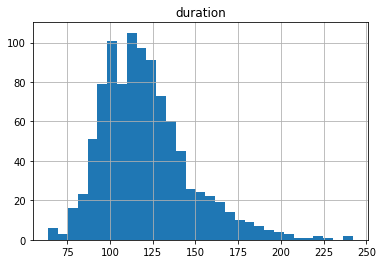

In [34]:
# Answer:
num_bins = round(math.sqrt(len(movies)))
movies.hist('duration', bins = (num_bins));

#### Use a box plot to display that same data.

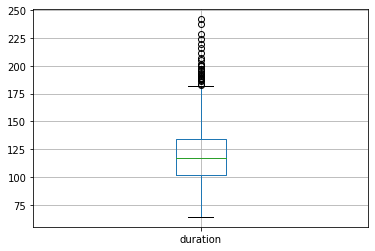

In [35]:
# Answer:
movies.boxplot('duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [41]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

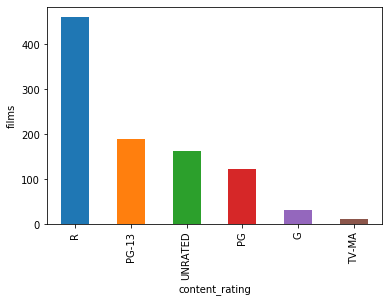

In [163]:
# Answer:
ax = movies.content_rating.value_counts().plot(kind='bar')
ax.set_xlabel('content_rating')
ax.set_ylabel('films');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [57]:
# Answer:
movies_two = movies
movies_two.content_rating.replace(['NOT RATED','APPROVED','PASSED','GP'],'UNRATED',inplace=True)
#to check:
movies_two.head()
#and then:
movies_two.content_rating.value_counts()





R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [58]:
# Answer:
movies_three = movies_two
movies_three.content_rating.replace(['NC-17','X'],'TV-MA',inplace=True)
#to check:
movies_three.head()
#and then:
movies_three.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
TV-MA       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [61]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [76]:
# Answer:
movies_four = movies_three
movies_four.content_rating.fillna('UNRATED',inplace=True)
#to check:
movies_four.content_rating.value_counts()

R          460
PG-13      189
UNRATED    163
PG         123
G           32
TV-MA       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [82]:
#create field:
movies_four['duration_bucket'] = '>=2 hours' 
#change values of field based on duration:
##drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'  
movies_four.loc[movies_four.duration.between(0, 120), 'duration_bucket'] = '< 2 hours'
# Answer:
movies_four.groupby('duration_bucket')['star_rating'].mean()


duration_bucket
< 2 hours    7.83849
>=2 hours    7.95367
Name: star_rating, dtype: float64

#### Use a visualization to detect whether there is a relationship between duration and star rating.

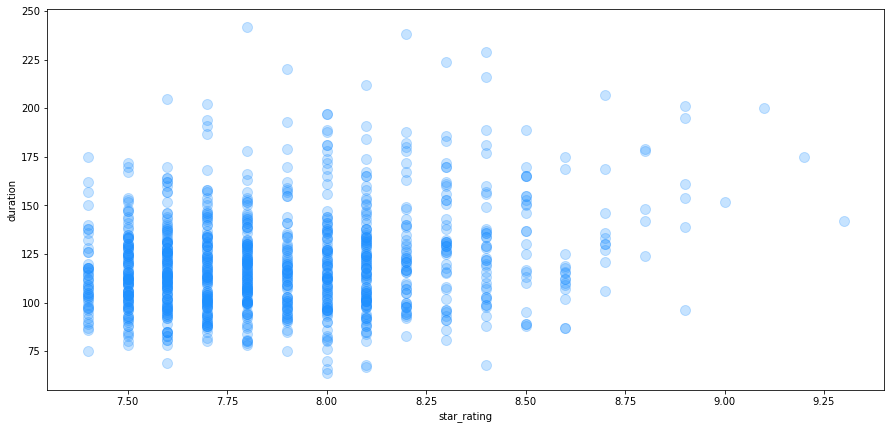

In [86]:
# Answer:
movies.plot(x='star_rating', y='duration', kind='scatter', color='dodgerblue', figsize=(15,7), s=100, alpha = .25);

#### Calculate the average duration for each genre.

In [87]:
# Answer:
movies_four.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

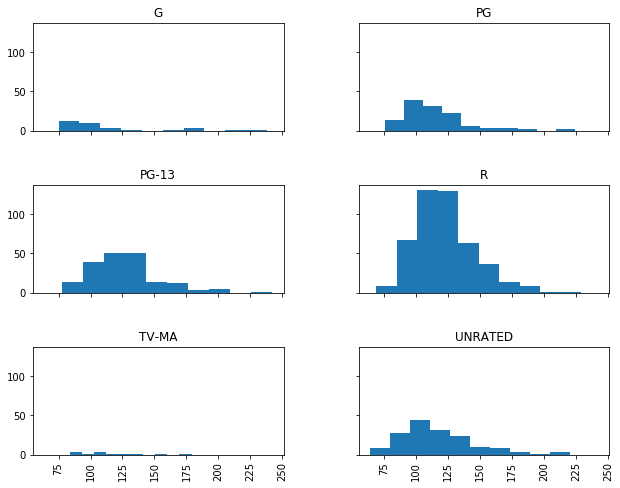

In [99]:
# Answer:
movies_four.hist(column='duration', by='content_rating', sharex=True, sharey=True, figsize=(10,8));

#### Determine the top rated movie (by star rating) for each genre.

In [106]:
# Answer:
movies_four.groupby(['genre'])['star_rating'].max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [131]:
# Answer:
# check for duplicate titles
movies_four.title.value_counts()
# we see four duplicate titles
# if these are actually duplicate records they would have the same actors list
# we can check to see if any of these titles have the same actors list
title_count = movies_four.groupby('title')['actors_list'].value_counts()
print('duplicate titles:', title_count[title_count >= 2])
# we see no duplicate titles
# and we can check the logic using a different filter (where we see titles returned):
print('non duplicate titles:', title_count[title_count >= 1])
# none of these are truly duplicates

duplicate titles: Series([], Name: actors_list, dtype: int64)
non duplicate titles: title                                actors_list                                                                
(500) Days of Summer                 [u'Zooey Deschanel', u'Joseph Gordon-Levitt', u'Geoffrey Arend']               1
12 Angry Men                         [u'Henry Fonda', u'Lee J. Cobb', u'Martin Balsam']                             1
12 Years a Slave                     [u'Chiwetel Ejiofor', u'Michael Kenneth Williams', u'Michael Fassbender']      1
127 Hours                            [u'James Franco', u'Amber Tamblyn', u'Kate Mara']                              1
2001: A Space Odyssey                [u'Keir Dullea', u'Gary Lockwood', u'William Sylvester']                       1
2046                                 [u'Tony Chiu Wai Leung', u'Ziyi Zhang', u'Faye Wong']                          1
21 Grams                             [u'Sean Penn', u'Benicio Del Toro', u'Naomi Watts']       

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [157]:
# Answer:
# first we'll check the value counts:
movies_four.genre.value_counts()
# then we'll create a series of approved genres and counts
genre_count = movies_four.genre.value_counts()
approved_genres = genre_count[genre_count >= 10]
# what we actually want is the index in this case so we'll use .index.tolist() to grab the genres
genre_list = approved_genres.index.tolist()
# then we'll return a list of approved films using the genre_list object as a filter
movies_five = movies_four[movies_four.genre.isin(genre_list)]
# then we'll calculate our average using this new subset of data
movies_five.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [166]:
leo = movies_four[movies_four['actors_list'].str.contains('Leonardo DiCaprio')]
tom_hanks = movies_four[movies_four['actors_list'].str.contains('Tom Hanks')]

print("leo's average rating:", leo.star_rating.mean())
print("tom's average rating:", tom_hanks.star_rating.mean())

#leo's films tend to have a slightly higher rating than tom's

leo's average rating: 8.054545454545455
tom's average rating: 8.014285714285714
